In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [67]:
import yfinance as yf
import datetime as dt

stock = "TCS.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 21)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [68]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2002-08-12 00:00:00+00:00,28.567654,39.700001,40.000000,38.724998,38.724998,212976
2002-08-13 00:00:00+00:00,28.180878,39.162498,40.387501,38.875000,39.750000,153576
2002-08-14 00:00:00+00:00,26.237976,36.462502,39.250000,35.724998,39.250000,822776
2002-08-15 00:00:00+00:00,26.237976,36.462502,36.462502,36.462502,36.462502,0
2002-08-16 00:00:00+00:00,26.175024,36.375000,38.000000,35.750000,36.275002,811856


In [69]:
df.shape

(5529, 6)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5529 entries, 2002-08-12 00:00:00+00:00 to 2024-11-19 00:00:00+00:00
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, TCS.NS)  5529 non-null   float64
 1   (Close, TCS.NS)      5529 non-null   float64
 2   (High, TCS.NS)       5529 non-null   float64
 3   (Low, TCS.NS)        5529 non-null   float64
 4   (Open, TCS.NS)       5529 non-null   float64
 5   (Volume, TCS.NS)     5529 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 302.4 KB


In [71]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,TCS.NS,0
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0


In [72]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5.529000e+03
mean,1165.100726,1272.664618,1286.181180,1259.467691,1273.167345,3.174514e+06
std,1209.149976,1225.770278,1236.789965,1215.074459,1226.077076,3.102166e+06
min,25.527390,35.474998,36.450001,32.474998,32.474998,0.000000e+00
25%,180.678116,243.600006,248.500000,240.000000,244.000000,1.644742e+06
50%,786.216675,963.900024,977.424988,947.025024,950.500000,2.487304e+06
75%,1835.328369,2016.099976,2039.949951,1999.300049,2023.000000,3.916760e+06
max,4542.667969,4553.750000,4592.250000,4512.000000,4576.000000,8.806715e+07


In [73]:
df = df.reset_index()

In [74]:
df.columns

MultiIndex([(     'Date',       ''),
            ('Adj Close', 'TCS.NS'),
            (    'Close', 'TCS.NS'),
            (     'High', 'TCS.NS'),
            (      'Low', 'TCS.NS'),
            (     'Open', 'TCS.NS'),
            (   'Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])

In [75]:
df.to_csv("TCS.csv")

In [76]:
data01 = pd.read_csv("TCS.csv")

In [77]:
data01.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1,0,2002-08-12 00:00:00+00:00,28.56765365600586,39.70000076293945,40.0,38.724998474121094,38.724998474121094,212976
2,1,2002-08-13 00:00:00+00:00,28.180877685546875,39.162498474121094,40.38750076293945,38.875,39.75,153576
3,2,2002-08-14 00:00:00+00:00,26.23797607421875,36.462501525878906,39.25,35.724998474121094,39.25,822776
4,3,2002-08-15 00:00:00+00:00,26.23797607421875,36.462501525878906,36.462501525878906,36.462501525878906,36.462501525878906,0


In [78]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [79]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

<ipython-input-79-8e9e58ec18af>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [80]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,39.700001,40.000000,38.724998,38.724998,212976
1,39.162498,40.387501,38.875000,39.750000,153576
2,36.462502,39.250000,35.724998,39.250000,822776
3,36.462502,36.462502,36.462502,36.462502,0
4,36.375000,38.000000,35.750000,36.275002,811856


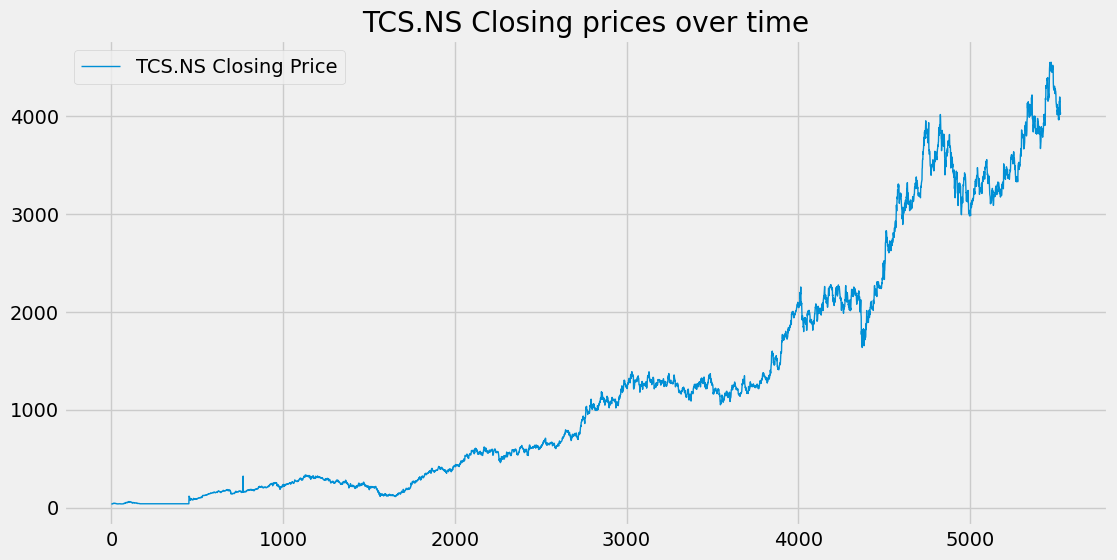

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

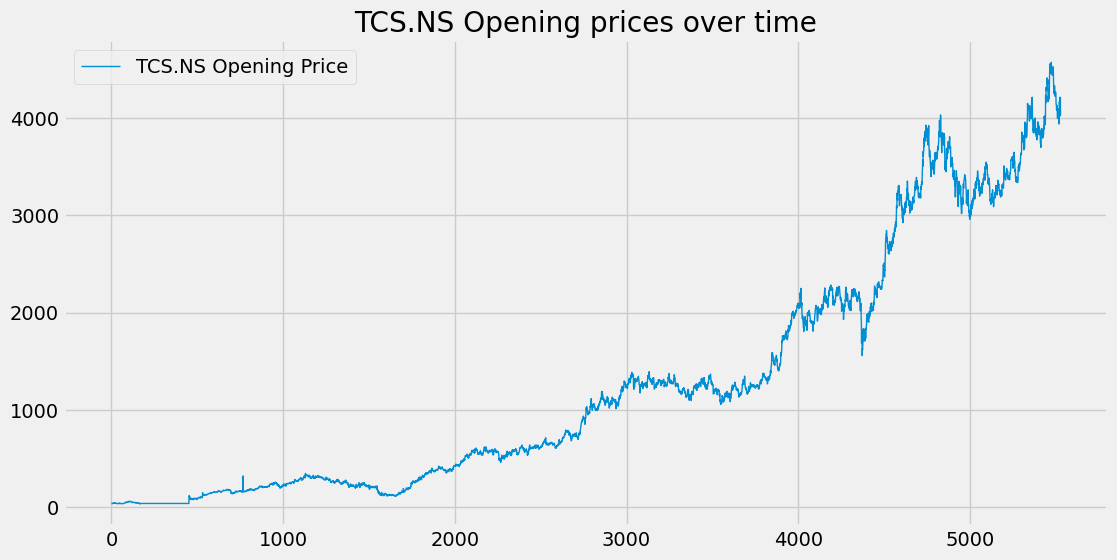

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

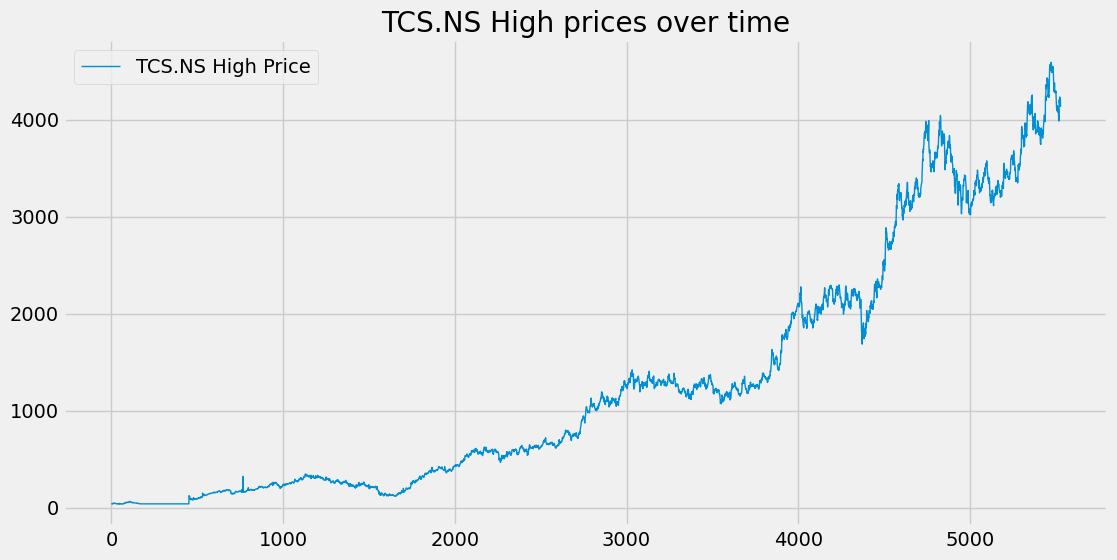

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()


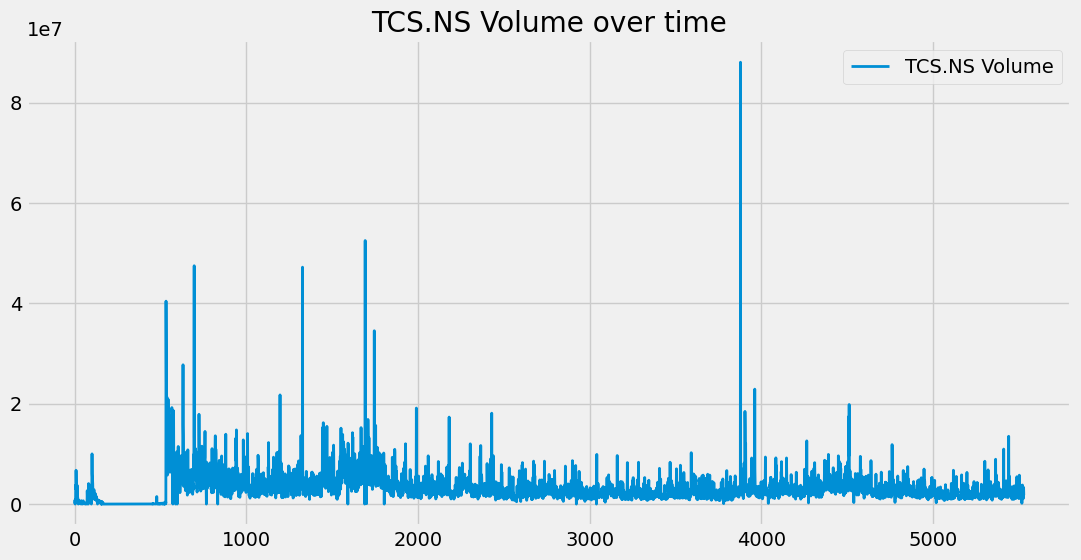

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()


In [85]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [86]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [87]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [88]:
ma100 = df.Close.rolling(100).mean()

In [89]:
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5524,4229.682493
5525,4233.078494
5526,4236.369492
5527,4238.179993


In [90]:
ma200 = df.Close.rolling(200).mean()

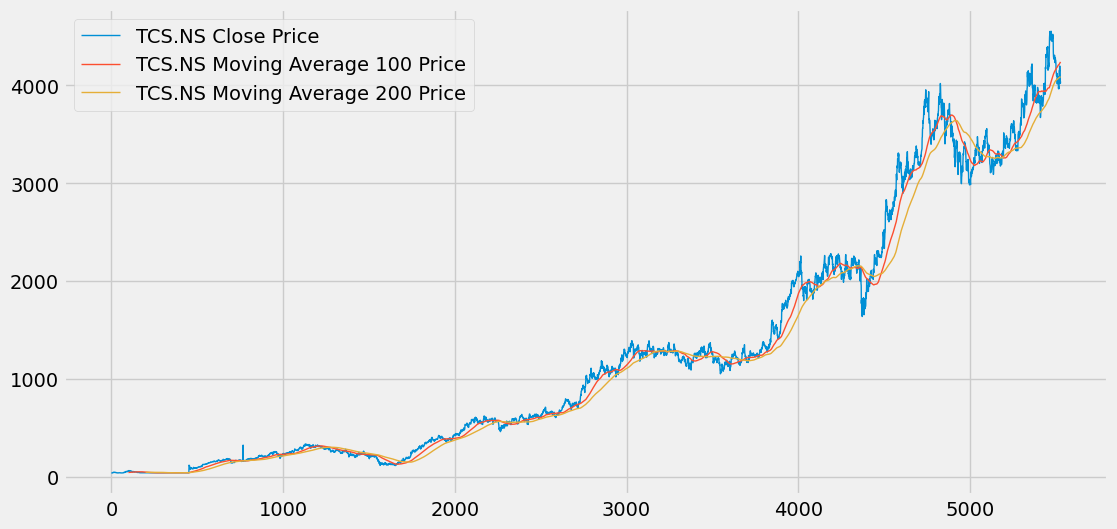

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [92]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [93]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()


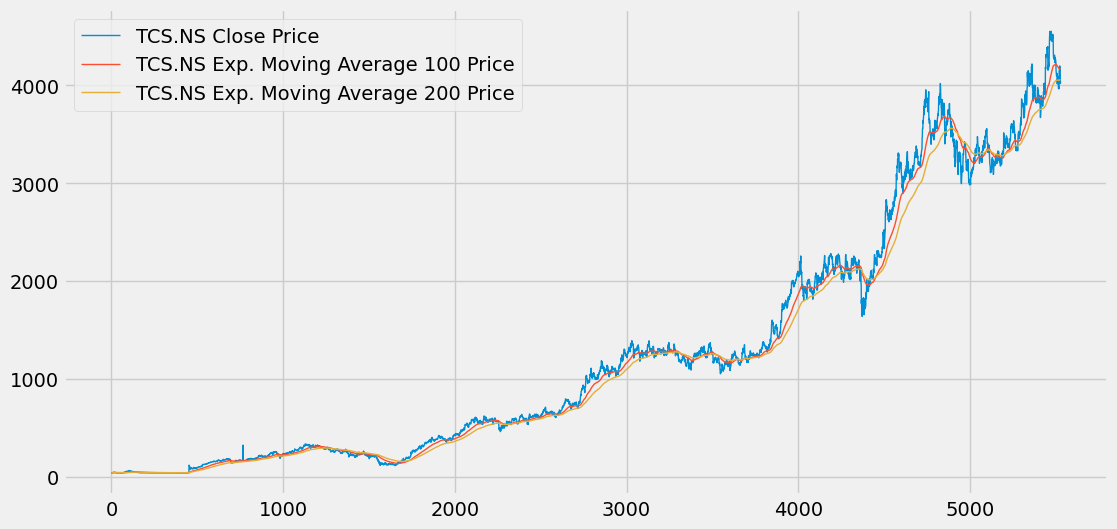

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [95]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [96]:
data_training.shape

(3870, 1)

In [97]:
data_testing.shape

(1659, 1)

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [99]:
data_training_array = scaler.fit_transform(data_training)

In [100]:
data_training_array

array([[2.70149439e-03],
       [2.35781187e-03],
       [6.31415979e-04],
       ...,
       [9.60660493e-01],
       [9.46561546e-01],
       [9.49966433e-01]])

In [101]:
data_training_array.shape[0]

3870

In [102]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [103]:
x_train.shape

(3770, 100, 1)

In [104]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [105]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [106]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 332ms/step - loss: 0.0462
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - loss: 0.0061
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - loss: 0.0051
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - loss: 0.0047
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - loss: 0.0045
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - loss: 0.0052
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - loss: 0.0047
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 320ms/step - loss: 0.0049
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.0044
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 346ms/step - loss: 0.0045
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 329ms/step - loss: 0.0039
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0041
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - loss: 0.0042
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - loss: 0.0038
Epoch 15/50
118

In [108]:
past_100_days = data_training.tail(100)

In [109]:
import pandas as pd

# Instead of using append, use concat to combine the DataFrames:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [110]:
final_df.head()

Ticker,TCS.NS
0,1214.800049
1,1223.324951
2,1227.050049
3,1229.625000
4,1250.175049


In [111]:
input_data = scaler.fit_transform(final_df)

In [112]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [113]:
x_test.shape

(1659, 100, 1)

In [114]:
y_predicted = model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step


In [115]:
y_predicted.shape

(1659, 1)

In [116]:
scaler.scale_

array([0.0002995])

In [117]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

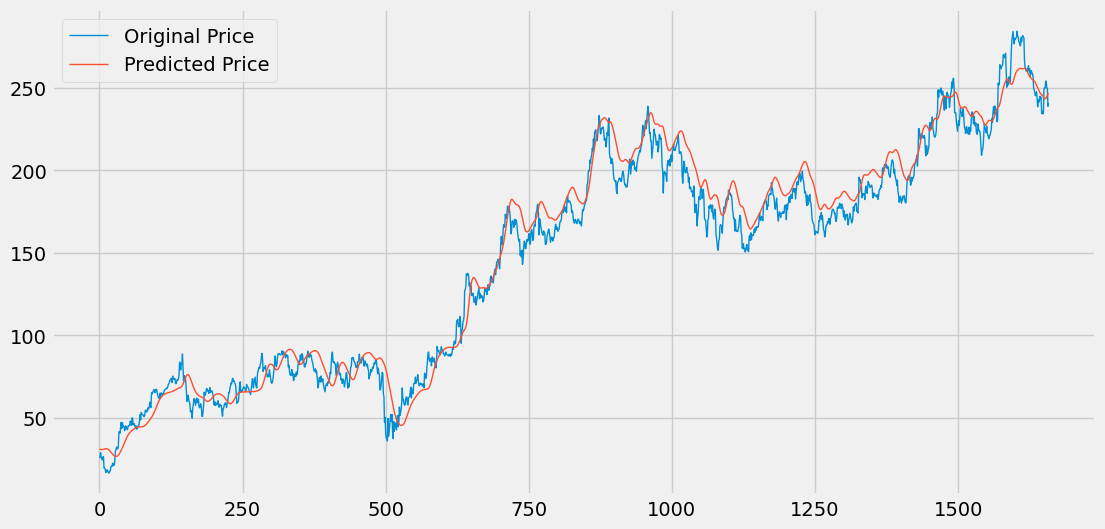

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [119]:
model.save('my_model.keras')